<a href="https://colab.research.google.com/github/andrewsundberg/DS301/blob/master/Lab6_PCA_SundbergAndrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 - Principal Component Analysis

#### A large part of the code was taken from <br>
#### 1. https://github.com/ageron/handson-ml <br>
#### 2. https://www.kaggle.com/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#### Load the Fashion MNIST dataset

In [0]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


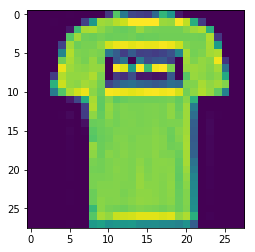

In [0]:
plt.imshow(X_train[1])

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train=X_train.reshape(60000, 28*28)

In [0]:
X_train.shape

(60000, 784)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
X_test=X_test.reshape(10000, 28*28)

In [0]:
X_test.shape

(10000, 784)

#### Projecting down to d = 4 dimensions

#### The top *d* principal components are projected onto a hyperplane, which causes the dimensionality of the dataset to be reduced to *d* dimenions.

In [0]:
pca = PCA(n_components = 8)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


#### Explained Variance Ratio

In [0]:
pca.explained_variance_ratio_


array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655,
       0.03460769, 0.02341691, 0.01905414])

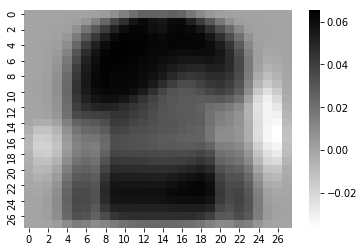

In [0]:
sns.heatmap(pca.components_[0].reshape(28, 28), cmap='gray_r')

#### Preserving the training set's variance

#### This step automatically selects a certain number of dimensions, that will sum to the specified variance.

In [0]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d1 = np.argmax(cumsum >= 0.25)+1
d2 = np.argmax(cumsum >= 0.50)+1
d3 = np.argmax(cumsum >= 0.75)+1
d4 = np.argmax(cumsum >= 0.95)+1
d5 = np.argmax(cumsum >= 1.00)+1

In [0]:
print("The number of Principal Components required to obtain -\n 1. 25% variance = ",d1," \n 2. 50% variance = ",d2," \n 3. 75% variance =", d3,"\n 4. 95% variance = ",d4,"\n 5. 100% variance = ",d5)

The number of Principal Components required to obtain -
 1. 25% variance =  1  
 2. 50% variance =  3  
 3. 75% variance = 14 
 4. 95% variance =  187 
 5. 100% variance =  784


#### Compressing datasets using PCA

#### We can compress datasets using PCA and therefore use it to acclerate ML algorithms!

In [0]:
X_train=X_train.astype('float64')
pca = PCA(n_components = 187)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [0]:
X_train.dtype

dtype('float64')

In [0]:
X_train.nbytes

376320000

In [0]:
X_train.dtype

dtype('float64')

In [0]:
X_reduced.nbytes

89760000

In [0]:
X_reduced.dtype

dtype('float64')

In [0]:

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Recovered after compression')

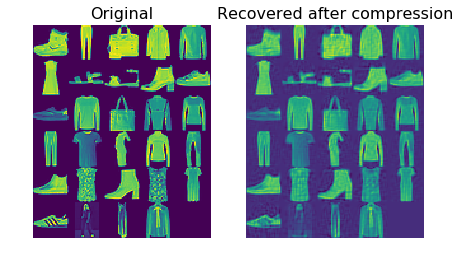

In [0]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovered after compression", fontsize=16)



## Fit and predict X_train vs X_train_pca with Classifier

To mesuare your running time (timer) sample code:

from timeit import default_timer as timer

start = timer()
# ...
end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282

Using LogisticRegression Classifier on PCA(n_components = 4)

Scaler:


from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [0]:
#from sklearn.preprocessing import StandardScaler
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [0]:
pca = PCA(n_components = 4)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression

# solver = 'lbfgs' for better performance

from timeit import default_timer as timer

start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 4) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282
print()

LogisticRegression Classifier on PCA(n_components = 4) - Training time:  7.032354080000005



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
#predict
y_pred = log_clf.predict(X_test_pca)

In [0]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on Scale PCA(n_components = 4) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on Scale PCA(n_components = 4) - Accuracy:  0.6667


In [0]:
pca = PCA(n_components = 4)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:

from sklearn.linear_model import LogisticRegression

# solver = 'lbfgs' for better performance

from timeit import default_timer as timer

start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 4) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282
print()

LogisticRegression Classifier on PCA(n_components = 4) - Training time:  6.9660118770002555



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Reference for solver = 'lbfgs'

https://scikit-learn.org/stable/modules/linear_model.html

The “lbfgs” is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm [8], which belongs to quasi-Newton methods. The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers. [9]

In [0]:
#predict
y_pred = log_clf.predict(X_test_pca)

In [0]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on PCA(n_components = 4) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on PCA(n_components = 4) - Accuracy:  0.6654


Using LogisticRegression Classifier on PCA(n_components = 14)

In [0]:
pca = PCA(n_components = 14)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:

from sklearn.linear_model import LogisticRegression


start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 14) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282



LogisticRegression Classifier on PCA(n_components = 14) - Training time:  7.840585192999697


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
from sklearn.linear_model import LogisticRegression


start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 14) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282



LogisticRegression Classifier on PCA(n_components = 14) - Training time:  44.83803908799973


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The PCA train set only took 8 seconds compared to the normal train data set taking 45 seconds.

In [0]:
#predict
y_pred = log_clf.predict(X_test_pca)

In [0]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on PCA(n_components = 14) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on PCA(n_components = 14) - Accuracy:  0.7674


Using LogisticRegression Classifier on PCA(n_components = 187)

In [0]:
pca = PCA(n_components = 187)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:

from sklearn.linear_model import LogisticRegression


start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 187) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282


LogisticRegression Classifier on PCA(n_components = 187) - Training time:  15.487850092000144


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
#predict
y_pred = log_clf.predict(X_test_pca)

In [0]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on PCA(n_components = 187) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on PCA(n_components = 187) - Accuracy:  0.8432


Using LogisticRegression Classifier on PCA(n_components = 784)

In [0]:
pca = PCA(n_components = 784)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:

from sklearn.linear_model import LogisticRegression


start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 784) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282




LogisticRegression Classifier on PCA(n_components = 784) - Training time:  45.19282134600007


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
#predict
y_pred = log_clf.predict(X_test_pca)

In [0]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on PCA(n_components = 784) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on PCA(n_components = 784) - Accuracy:  0.8439
